<a href="https://colab.research.google.com/github/dezlorator1/DSS/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from PIL import Image
from google.colab import drive
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ПОДГОТОВ ОЧКА КАРТИНОК


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = mpimg.imread('/content/drive/MyDrive/img/CutMoscow.jpg')

plt.figure()
plt.imshow(img)

In [170]:
chopsize = 50
infile = r"/content/drive/MyDrive/img/CutMoscow.jpg"
outfile = r"/content/drive/MyDrive/img_color/cut_img_color/"
img = Image.open(infile)
width, height = img.size
count = 0 ;
# Save Chops of original image
for x0 in range(0, width, chopsize):
   for y0 in range(0, height, chopsize):
      box = (x0, y0,
             x0+chopsize if x0+chopsize <  width else  width - 1,
             y0+chopsize if y0+chopsize < height else height - 1)
      #print('%s %s' % (infile, box))
      img.crop(box).save(outfile + f'{count}' + '.jpg', "JPEG")
      count = count + 1

In [ ]:
files.upload()

ЗАГОТОВКА МАССИВОВ ДАННЫХ

In [180]:
train_black_dir = r"/content/drive/MyDrive/img_black"
df_black = ImageDataGenerator(rescale=1. / 255)

In [181]:
df_black_gen = df_black.flow_from_directory(
    train_black_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)

Found 960 images belonging to 1 classes.


In [182]:
x_black, _ = df_black_gen.next()

In [183]:
train_color_dir = r"/content/drive/MyDrive/img_color/"
df_color = ImageDataGenerator(rescale=1. / 255)

In [184]:
df_color_gen = df_color.flow_from_directory(
    train_color_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)

Found 960 images belonging to 1 classes.


In [185]:
y_color, _ = df_color_gen.next()

In [186]:
test_black_dir = r"/content/drive/MyDrive/volgograd_black"
test_black1 = ImageDataGenerator(rescale=1. / 255)
test_black_gen = test_black1.flow_from_directory(
    test_black_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)
test_black, _ = test_black_gen.next()

Found 960 images belonging to 1 classes.


In [187]:
test_color_dir = r"/content/drive/MyDrive/volgograd_color/"
test_color1 = ImageDataGenerator(rescale=1. / 255)
test_color_gen = test_color1.flow_from_directory(
    test_color_dir,
    target_size=(50, 50),
    color_mode="rgb",
    class_mode='categorical',
    batch_size=960,
    shuffle=False
)
test_color, _ = test_color_gen.next()

Found 960 images belonging to 1 classes.


In [ ]:
plt.figure()
plt.imshow(x_black[1])
plt.figure()
plt.imshow(y_color[1])

НА ЭТО ГОВНО СМОТРЕТЬ НЕ НАДО

А ПРИЙДЕТСЯ...

In [ ]:
cut_black = np.array([])
#black = np.array([])
for i in range(2):
  img = mpimg.imread('/content/drive/MyDrive/img/cut_img_black/' + f'{i}' + '.jpg')
  #black = np.append(black, img)
  cut_black = np.append(cut_black, img)
  print(cut_black)
  #cut_black.append(img)

In [ ]:
cut_color = np.array([])
for i in range(960):
    img = mpimg.imread('/content/drive/MyDrive/img/cut_img_color/' + f'{i}' + 'c.jpg')
    cut_color = np.append(cut_color, img)
    #cut_color.append(img)

In [ ]:
print(cut_black[0])

In [ ]:
plt.figure()
plt.imshow(cut_black[0])
#plt.figure()
#plt.imshow(cut_color[0])


In [ ]:
for i in range(960):
  cut_black[i] = cut_black[i] / 255
  cut_color[i] = cut_color[i] / 255

НЕЙРОНКА


In [205]:
model = keras.Sequential([
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3)),
    Dense(1200, activation='relu'),
    Dropout(0.4),
    Dense(150, activation='relu'),
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3))
])


In [206]:
print(model.summary()) 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 50, 50, 3)         12        
_________________________________________________________________
dense_49 (Dense)             (None, 50, 50, 1200)      4800      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 50, 1200)      0         
_________________________________________________________________
dense_50 (Dense)             (None, 50, 50, 150)       180150    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 50, 50, 3)         453       
Total params: 185,415
Trainable params: 185,415
Non-trainable params: 0
_________________________________________________________________
None


In [207]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [208]:
model.fit(x_black, y_color, batch_size=32, epochs=5, validation_split=0.10)

Epoch 1/5
27/27 [==============================] - 88s 3s/step - loss: 0.9863 - accuracy: 0.4943 - val_loss: 0.4970 - val_accuracy: 0.8367
Epoch 2/5
27/27 [==============================] - 86s 3s/step - loss: 0.5270 - accuracy: 0.8162 - val_loss: 0.4820 - val_accuracy: 0.8367
Epoch 3/5
27/27 [==============================] - 87s 3s/step - loss: 0.5186 - accuracy: 0.8120 - val_loss: 0.4791 - val_accuracy: 0.8367
Epoch 4/5
27/27 [==============================] - 88s 3s/step - loss: 0.5141 - accuracy: 0.8220 - val_loss: 0.4775 - val_accuracy: 0.8367
Epoch 5/5
27/27 [==============================] - 90s 3s/step - loss: 0.5115 - accuracy: 0.8116 - val_loss: 0.4758 - val_accuracy: 0.8367


In [209]:
model.evaluate(test_black, test_color)

30/30 [==============================] - 23s 767ms/step - loss: 0.3435 - accuracy: 0.6036


[0.3435407876968384, 0.6036279201507568]

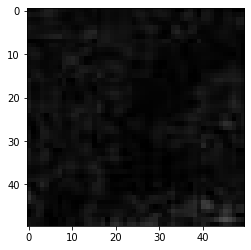

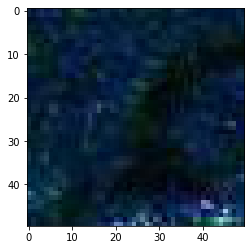

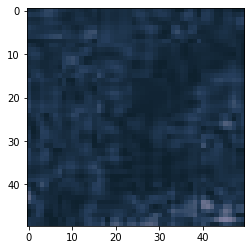

In [211]:
predictions = model.predict(x_black)
img_num = 228
plt.figure()
plt.imshow(x_black[img_num])
plt.figure()
plt.imshow(y_color[img_num])
plt.figure()
plt.imshow(predictions[img_num])
#img = mpimg.imread('/content/drive/MyDrive/img/CutMoscow.jpg')
#print(x_black[0])
#plt.figure()
#plt.imshow(img)

loss='binary_crossentropy', 81%

model = keras.Sequential([
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3)),
    Dense(1500, activation='relu'),
    Dropout(0.4),
    Dense(100, activation='relu'),
    Conv2D(filters=3, kernel_size = 1, input_shape=(50, 50, 3))
]) 0.8474